# Assigment 1

## Part 1 : Implement logistic regression

I implemented a logistic regresion according to the pseudo code provided in the slide : 
- Intialisation of parameters
- While the convergence criteria is not reached
    - Forward propagation = sigmoid(W * X + b)  
    - Backward propagation with DW = (y-y_hat)*x
    - Gradient descent W -= lr*DW and b -= lr*db
    - Check for convergence

In my implementation I tried to stay consistent with the notation provided in the slide (replacing greek letters)
I choose to store the parameters in an numpy array which are handy for matrix multplication and vectorisation. However for back propagation I did not use vectorisation so it will be less effecient but I understand it better and the formulas are more close to the lecture note.

In [1]:
import numpy as np # array manipulation
import random as rd # randomness
import pandas as pd # dataframe manipulation
import matplotlib.pyplot as plt # ploting
from sklearn.metrics import accuracy_score,confusion_matrix # score metrics
import seaborn as sns # more visualisation

In [2]:
def sigmoid(x):
    """sigmoid function return 1 / (1 + e^-x)"""
    return 1/(1+np.exp(-x))

In [81]:
def logistic_regression(X,Y,lr = 0.001, max_iterations = 1000000,eps = 1e-4,mu = 0,sigma = 0.1):
    """
    X is training data, must ne numeric
    Y is the label, must be binary because we are doing binary classification
    lr is the learning rate of gradient descent
    max_iterations is the maximum number of iteration if convergence is not reached
    esp is thex treshold to check for convergence
    """

    # initialise parameters

    stopping = False
    J_running = 0
    J_running_prev = 0
    iteration = 0 
    J_list = []
    epoch = 0
    w = np.random.normal(mu,sigma,size=X.shape[1])
    b = np.random.normal(mu,sigma)
    N = len(X[:,1])

    # Convergence is not reached or max_iterations
    while not stopping:
        #Set {x, y} = single example from training set selected at random
        i = rd.randint(0,N-1)
        x,y = X[i],Y[i]
        # Forward propagation stage
        y_hat = sigmoid(np.dot(x,w) + b) 

        #Calculate J_current from y, y_hat
        J_current = - (y*np.log(y_hat + 1e-8) + (1-y)*np.log(1-y_hat+1e-8))

        DW = []
        DB = []
        # Back propagation
        for j in range(len(w)):
            DW.append((y_hat-y)*x[j])
            DB.append(y_hat-y)
        # Gradient descent 
        for j in range(len(w)):
            w[j] -= lr * DW[j]
            b -= lr * DB[j]

        # Check stopping criteria
        iteration += 1
        J_running += J_current
        if iteration > max_iterations: stopping = True 
        if (iteration % N) == 0: 
            epoch += 1
            J_running = J_running / N # normalise the cost function to a single iteration
            J_list.append(J_running)
            if abs(J_running - J_running_prev) < eps : stopping = True
            J_running_prev = J_running
            J_running = 0
            print(f'epoch {epoch} J = {J_running_prev}')

    # Print wether the convergence is reached or not
    if iteration == max_iterations+1:
        print("max iteration reached, convergence is not reached you may need to adjust parameters")
    else : 
        print(f"Training complete, convergence is reached after {epoch} epochs")
    
    
    return (J_list,w,b)

#### Testing

In [17]:
X = np.array([[2,3,4.89,0,1],
              [1,2,4,5,10]])
Y = np.array([0,1])
logistic_regression(X,Y);

epoch 1 J = 0.7880460658587878
epoch 2 J = 1.201978334505168
epoch 3 J = 1.492262507995106
epoch 4 J = 0.804647674720755
epoch 5 J = 0.7788402415930746
epoch 6 J = 0.754114647445705
epoch 7 J = 1.108527537118721
epoch 8 J = 1.0752621586262192
epoch 9 J = 1.0437710882742608
epoch 10 J = 1.2223834272141252
epoch 11 J = 0.9556826299897565
epoch 12 J = 0.931016314460268
epoch 13 J = 0.9823740475027645
epoch 14 J = 0.8639720682730765
epoch 15 J = 0.8447870131895792
epoch 16 J = 0.8266330595162374
epoch 17 J = 0.7651276418154378
epoch 18 J = 0.7795735125763722
epoch 19 J = 0.8359497948294097
epoch 20 J = 0.7637716369504732
epoch 21 J = 0.7499205985736432
epoch 22 J = 0.736577834123713
epoch 23 J = 0.6105775559753911
epoch 24 J = 0.7036503406544181
epoch 25 J = 0.6929572641379425
epoch 26 J = 0.8185682671924064
epoch 27 J = 0.537004329061328
epoch 28 J = 0.6633547148635076
epoch 29 J = 0.47437394104294917
epoch 30 J = 0.43350141216990945
epoch 31 J = 0.6318097945858527
epoch 32 J = 0.83644811

## Part 2 : Easy tasks

### Blob dataset

In [18]:
blob = pd.read_csv('blobs400.csv')
X_blob = blob[['X1','X2','X3']]
Y_blob = blob['Class']
X_blob = X_blob.to_numpy()
Y_blob = Y_blob.to_numpy()

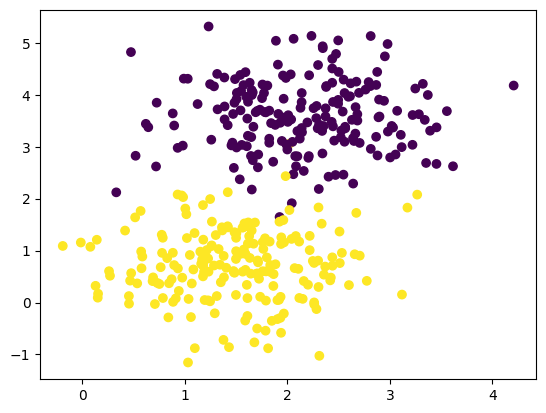

In [19]:
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=Y_blob, cmap='viridis');

In [20]:
def predict_logistic(X,w,b):
    """ forward pass for logistic regression and threshold for prediction """
    y_pred = sigmoid(np.dot(X,w) + b) 
    y_pred_binary = [1 if y > 0.5 else 0 for y in y_pred]
    return y_pred_binary

#### Train test split

Train 50 %  
Validation 25 %  
Test 25 %  

In [21]:
from sklearn.model_selection import train_test_split
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_blob, Y_blob, test_size=0.5, random_state=42)
X_test_b, X_val_b, y_test_b, y_val_b = train_test_split(X_test_b, y_test_b, test_size=0.5, random_state=42)

#### Training

In [49]:
J_list,w,b = logistic_regression(X_train_b,y_train_b,lr = 0.001,eps = 1e-6,max_iterations=1000000)

epoch 1 J = 0.6350444963640414
epoch 2 J = 0.5515003232012071
epoch 3 J = 0.5409735339847226
epoch 4 J = 0.529022185549174
epoch 5 J = 0.48789816649437745
epoch 6 J = 0.4499852496235781
epoch 7 J = 0.4355686582502555
epoch 8 J = 0.3935358308257335
epoch 9 J = 0.404098493053338
epoch 10 J = 0.4004988636568255
epoch 11 J = 0.37920278118161505
epoch 12 J = 0.37591395034097574
epoch 13 J = 0.3404158597178544
epoch 14 J = 0.3383047570988633
epoch 15 J = 0.3179115771326173
epoch 16 J = 0.32607458072924816
epoch 17 J = 0.30134566717918043
epoch 18 J = 0.3074477057967243
epoch 19 J = 0.32194359663859806
epoch 20 J = 0.2799436079018795
epoch 21 J = 0.2648708316892915
epoch 22 J = 0.2721328787240418
epoch 23 J = 0.29332931201374046
epoch 24 J = 0.275361907134767
epoch 25 J = 0.2763140933595101
epoch 26 J = 0.23419357667443017
epoch 27 J = 0.22321258875106548
epoch 28 J = 0.2520625360389069
epoch 29 J = 0.23462551345050545
epoch 30 J = 0.22586634168853162
epoch 31 J = 0.22219321950775994
epoch 32

#### Learning curve

Text(0.5, 1.0, 'Learning curve')

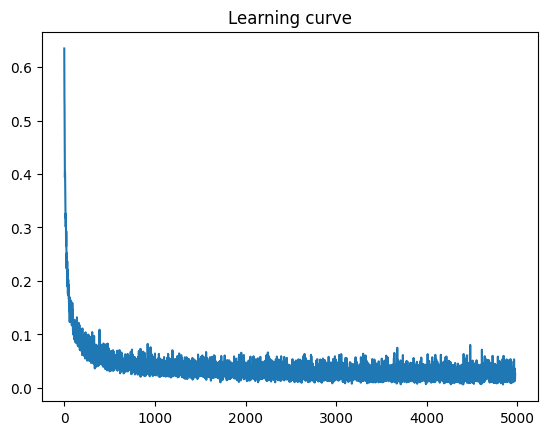

In [50]:
import matplotlib.pyplot as plt
plt.plot(J_list)
plt.title("Learning curve")

Note on the training curve:
- Parameter initialisation impact
    - for `mu = 0` and `nu = 1` I have faster convergence but each time I re-run the algorithm I have a different learning curve shape
    - for `mu = 0` and `nu = 0.1` I have more epoch but always the same learning curve shape, so there is less variability
- Learning rate impact : 
    - for `lr = 0.1` we observe unstability and convergence is not reached after 1 milion iteration
    - for `lr = 0.001` convergence is reached but there is still some unstability 

I choose to keep `nu = 0.1` for the rest of the assigment to have good reproducability and less variability between the results (we could also set a random seed)  
The unstability may be explained by the fact that stochastic gradient descent is stochastic so the gradient may not be accurate there for the parameters can "zig zag" their way through the optimal solution

#### Validation

In [51]:
# Validation
from sklearn.metrics import accuracy_score
y_pred = predict_logistic(X_val_b,w,b)
acc = accuracy_score(y_pred,y_val_b)
print(f'Validation accuracy score : {acc: .3f}')

Validation accuracy score :  0.960


Experiments : 
- `lr = 0.001 and eps = 1e-6 `--> 0.960
- `lr = 0.001 and eps = 1e-7` --> O.960 but convergence is not reached
- `lr = 0.0005, eps = 1e-6` --> 0.960 but convergence is not reached
- `lr = 0.0005, eps = 1e-6 max_iterations = 10 millions` --> 0.950 and convergence is reached --> overfitting !

Based on these experiments on the validation set I will set the parameter to lr = 0.001, eps = 1e-6 and max_iteration = 1 million for the test set

#### Test

In [56]:
# Train on train + validation set 
X_train_b_tot = np.concatenate((X_train_b, X_val_b), axis=0)
y_train_b_tot = np.concatenate((y_train_b, y_val_b), axis=0)
J_list,w,b = logistic_regression(X_train_b_tot,y_train_b_tot,lr = 0.001,eps = 1e-6,max_iterations=1000000)

epoch 1 J = 0.7105671758939781
epoch 2 J = 0.6359202021168876
epoch 3 J = 0.5700915206909258
epoch 4 J = 0.5274466417073346
epoch 5 J = 0.4443210341975108
epoch 6 J = 0.46214277224682065
epoch 7 J = 0.4069815359528392
epoch 8 J = 0.4052189060804512
epoch 9 J = 0.39336504993113797
epoch 10 J = 0.35746968410658936
epoch 11 J = 0.3620331777886733
epoch 12 J = 0.330939210347232
epoch 13 J = 0.31065973315161577
epoch 14 J = 0.30552685878203545
epoch 15 J = 0.30965446226795285
epoch 16 J = 0.28739123855355364
epoch 17 J = 0.2856684566607241
epoch 18 J = 0.2627579238861575
epoch 19 J = 0.24457076401001607
epoch 20 J = 0.24920854794119454
epoch 21 J = 0.2565152621262981
epoch 22 J = 0.24820585944651385
epoch 23 J = 0.23456583947251497
epoch 24 J = 0.24710962377202653
epoch 25 J = 0.2170036276925399
epoch 26 J = 0.2203808185345539
epoch 27 J = 0.23220351888933166
epoch 28 J = 0.22185046043436416
epoch 29 J = 0.18084332823222865
epoch 30 J = 0.1908900266254761
epoch 31 J = 0.19722525749607772
ep

We see that convergence is not reached but I won't increase the max_iterations to avoid overfitting

In [57]:
y_pred = predict_logistic(X_test_b,w,b)
acc = accuracy_score(y_pred,y_test_b)
print(f'Test accuracy score : {acc: .3f}')

Test accuracy score :  0.990


The accuracy is not equal to 1 because data has been generated with noise, therefore it is not perfeclty linearly seperable. However the result is very close to 1 so algorithm is working good.

#### Visualisation of the result

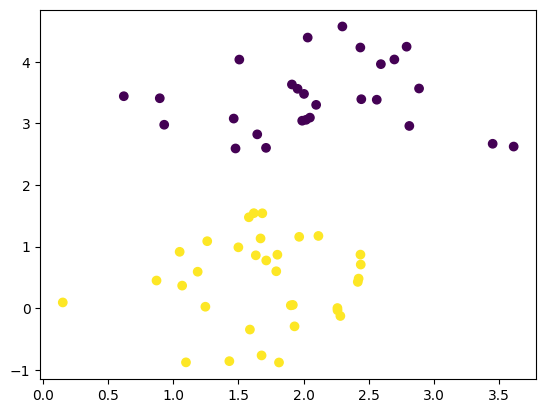

In [151]:
plt.scatter(X_test_b[:, 0], X_test_b[:, 1], c=y_pred, cmap='viridis');

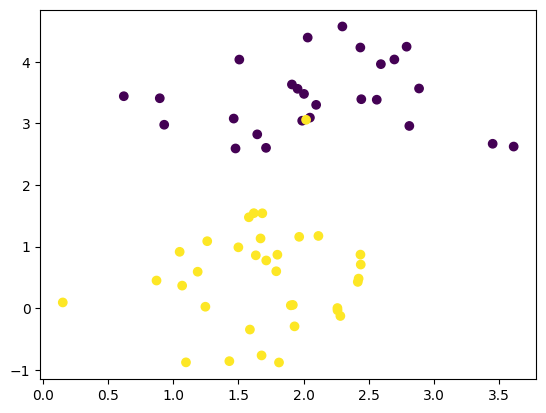

In [152]:
plt.scatter(X_test_b[:, 0], X_test_b[:, 1], c=y_test_b, cmap='viridis');

We can see here one yellow point that is not linearly separate from the other class ( at least on this 2 dimensions) so the algorithm is missclassifying it

### Circle dataset

I will use the same methodology for this dataset

In [60]:
circle = pd.read_csv('circles500.csv')
X_circle = circle[['X0','X1']]
Y_circle = circle[['Class']]
X_circle = X_circle.to_numpy()
Y_circle = Y_circle.to_numpy()
Y_circle = Y_circle.reshape(500)

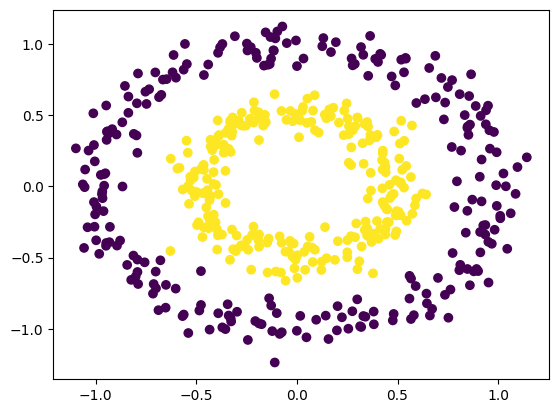

In [61]:
plt.scatter(X_circle[:, 0], X_circle[:, 1], c=Y_circle, cmap='viridis');

In [67]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_circle, Y_circle, test_size=0.7, random_state=42)
X_test_c, X_val_c, y_test_c, y_val_c = train_test_split(X_test_c, y_test_c, test_size=0.5, random_state=42)

In [85]:
J_list,w,b = logistic_regression(X_train_c,y_train_c,lr = 0.001,eps =1e-4,max_iterations=1000000,sigma = 2)

epoch 1 J = 1.9419113261732335
epoch 2 J = 1.7495254362013968
epoch 3 J = 1.6693985590223746
epoch 4 J = 1.4084223988838314
epoch 5 J = 1.6813937355137216
epoch 6 J = 1.6649601000497931
epoch 7 J = 1.5680417363001393
epoch 8 J = 1.35345932587423
epoch 9 J = 1.3870989164814083
epoch 10 J = 1.3250517594572657
epoch 11 J = 1.1814188726665986
epoch 12 J = 1.1993187435123425
epoch 13 J = 1.247001045469539
epoch 14 J = 1.2231220046429674
epoch 15 J = 0.988296509077339
epoch 16 J = 1.1457535172292355
epoch 17 J = 0.9027679774700901
epoch 18 J = 0.9810147006323333
epoch 19 J = 0.9939478340727883
epoch 20 J = 1.0038527327118099
epoch 21 J = 0.8606813299285971
epoch 22 J = 0.8711160018969516
epoch 23 J = 0.9163433261258617
epoch 24 J = 0.9263413908393342
epoch 25 J = 0.8169532488000136
epoch 26 J = 0.8032025253897386
epoch 27 J = 0.8661077775313786
epoch 28 J = 0.812020548081501
epoch 29 J = 0.8130066808732335
epoch 30 J = 0.7754601939692862
epoch 31 J = 0.7564869161231781
epoch 32 J = 0.7865356

Text(0.5, 1.0, 'Learning curve')

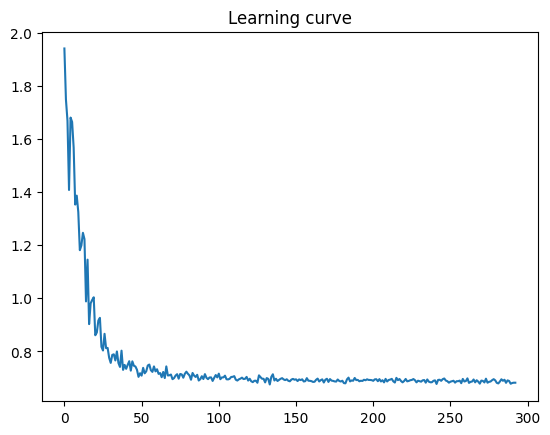

In [86]:
plt.plot(J_list)
plt.title("Learning curve")

#### Notes 
- I had to set `sigma = 2` to observe a learning curve to add artificially some error  
- Every parameter setting leads to poor result because the data is not linearly seperable

In [87]:
y_pred = predict_logistic(X_val_c,w,b)
acc = accuracy_score(y_pred,y_val_c)
print(f'Validation score : {acc: .3f}')

Validation score :  0.451


In [88]:
y_pred = predict_logistic(X_test_c,w,b)
acc = accuracy_score(y_pred,y_test_c)
print(f'Test Accuracy score : {acc: .3f}')

Test Accuracy score :  0.400


In [89]:
#### Visualisation

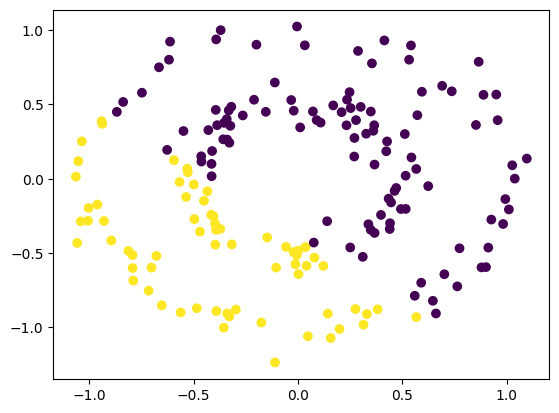

In [90]:
plt.scatter(X_test_c[:, 0], X_test_c[:, 1], c=y_pred, cmap='viridis');

We can see that the algorithm try to separate the data with a straight line but the circle data is not linearly separable

## Part 3

Shallow neural net is a neural network with only two layer. The implementation will only include binary classification.  
It works similarly than logistic regression but with a more complex structure which will be able to learn non-linear patterns.

Forward propagation consist now of propagating the signal to all neurons and then apply an activation function (sigmoid) to each neurons  
Back propagation consist of computing the gradient trough all the network starting from the output error to the input layer

For my implementation, I reused the code of logistic regression and made some modification to make it as close as possible to the lecture notes  
I 4 different numpy array to store the parameter in each of the two layer (hidden layer and output layer). The first issue I faced is related to the dimension of those vectors, I had to really understand the architecture to make it work.
for forward propagation I used vectorisation with matrix multiplication `z1 = W1*x + b1` and `z2 = W2*a1 + b2`. But I had to figure out that we have to transpose `a1` to have the right matrix shape for multiplication.

Again I did not use vectorisation for backprop because I understand it better and it is closer to the lecture slide

In [95]:
def dsigmoid(x):
    """ derivative of the sigmoid function"""
    return sigmoid(x)*(1-sigmoid(x))

In [163]:
def shallowNeuralNet(X,Y,n_nodes,lr = 0.001, max_iterations = 1000000,eps = 1e-4,nu = 0, sigma = 0.1):
    stopping = False
    # initialize parameters
    W1 = np.random.normal(nu,sigma,size=(n_nodes,X.shape[1]))
    b1 = np.random.normal(nu,sigma,size=(1,n_nodes))
    W2 = np.random.normal(nu,sigma,size=(1,n_nodes))
    b2 = np.random.normal(nu,sigma)

    N = len(X[:,1])
    J_running = 0
    J_running_prev = 0
    iteration = 0 
    J_list = []
    epoch = 0
    while not stopping: 
        i = rd.randint(0,N-1)
        x,y = X[i],Y[i]
        x = x.T
        # forward propagation 
        z1 = W1 @ x + b1
        a1 = sigmoid(z1) 
        z2 = W2 @ a1.T + b2
        a2 = sigmoid(z2)
        y_hat = a2[0,0]
        J_current = - (y*np.log(y_hat + 1e-8) + (1-y)*np.log(1-y_hat + 1e-8))

        # Backpropagation

        # output layer 
        dz2  = y_hat - y
        dW2 = dz2*a1
        db2 = dz2
      
        # Hidden Layer 
        dz1 = []
        for i in range(n_nodes): 
            dz1.append(dsigmoid(z1[0,i]) * dz2 * W2[0,i])
        
        dW1 = np.zeros((n_nodes,X.shape[1]))
        db1 = np.zeros((1,n_nodes))

        for j in range(n_nodes):
            db1[0,j] = dz1[j]
            for i in range(X.shape[1]):
                dW1[j,i] = dz1[j] * x[i]
                

        # Update weight with gradient descent : 
        W1 -= lr * dW1
        b1 -= lr * db1
        W2 -= lr*dW2
        b2 -= lr*db2

        
    

        # Check stopping criteria
        iteration += 1
        J_running += J_current
        if iteration > max_iterations: stopping = True 
        if (iteration % N) == 0: 
            epoch += 1
            J_running = J_running / N
            J_list.append(J_running)
            if abs(J_running - J_running_prev) < eps : stopping = True
            print(f'epoch {epoch} J = {J_running}')
            J_running_prev = J_running
            J_running = 0
            

    # Print wether the convergence is reached or not
    if iteration == max_iterations + 1:
        print("max iteration reached, convergence is not reached you may need to adjust parameters")
    else : 
        print(f"Training complete, convergence is reached after {epoch} epochs")
    return (J_list,W1,W2,b1,b2)

In [97]:
def predict_shallowNN(X,W1,W2,b1,b2):
    y_pred = []
    for i in range(len(X[:,1])):
        x = X[i]
        z1 = W1 @ x + b1
        a1 = sigmoid(z1) 
        z2 = W2 @ a1.T + b2
        a2 = sigmoid(z2)
        y_hat = a2[0,0]
        y_pred.append(y_hat)
    y_pred_binary = [1 if y > 0.5 else 0 for y in y_pred]
    return y_pred_binary

#### blob dataset 

In [145]:
n_nodes = 5
J_list,W1,W2,b1,b2 = shallowNeuralNet(X_train_b,y_train_b,n_nodes,eps = 1e-6,lr = 0.001,sigma=0.1,max_iterations=150000)

epoch 1 J = 0.6972999219486935
epoch 2 J = 0.6929334638248598
epoch 3 J = 0.6955682249823549
epoch 4 J = 0.6957141349514027
epoch 5 J = 0.6947698535013399
epoch 6 J = 0.6899492893556469
epoch 7 J = 0.6882187591616608
epoch 8 J = 0.6946319922549242
epoch 9 J = 0.6868799755752186
epoch 10 J = 0.6963753226498511
epoch 11 J = 0.6902211211499618
epoch 12 J = 0.6847301319540304
epoch 13 J = 0.6767179996015952
epoch 14 J = 0.6856435889302233
epoch 15 J = 0.6876227745983374
epoch 16 J = 0.6853255272229837
epoch 17 J = 0.6871809991679805
epoch 18 J = 0.6823250170527575
epoch 19 J = 0.6795225415673158
epoch 20 J = 0.6778566584923644
epoch 21 J = 0.692515453901628
epoch 22 J = 0.6737574149021526
epoch 23 J = 0.6795250576503331
epoch 24 J = 0.6774392469344575
epoch 25 J = 0.6850577614768157
epoch 26 J = 0.6711692432988987
epoch 27 J = 0.680542247058994
epoch 28 J = 0.6701678226385265
epoch 29 J = 0.6725750847115175
epoch 30 J = 0.6673310867116453
epoch 31 J = 0.683643859007918
epoch 32 J = 0.67180

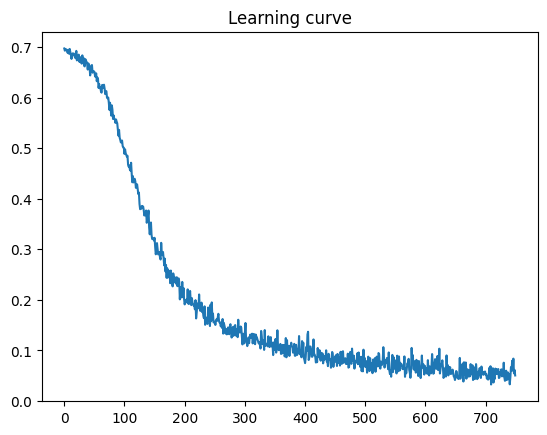

In [146]:
plt.plot(J_list)
plt.title("Learning curve");

In [147]:
y_pred = predict_shallowNN(X_val_b,W1,W2,b1,b2)
acc = accuracy_score(y_pred,y_val_b)
print(f'Accuracy score : {acc: .3f}')

Accuracy score :  0.950


Experiment : 
- `n_nodes = 1,eps = 1e-6,lr = 0.001,max_iterations=1million` --> convergence is reached after 7884 epochs, accuracy of 0.94, may overfit, reduce the max_iteration
- `n_nodes = 1,eps = 1e-6,lr = 0.001,max_iterations= 500 000` --> convergence not reached, accuracy of 0.95, increase number of nodes
- `n_nodes = 2,eps = 1e-6,lr = 0.001,max_iterations= 500 000` --> convergence not reached accuracy of 0.95. increase number of nodes
- `n_nodes = 5,eps = 1e-6,lr = 0.001,max_iterations= 500 000` --> still 0.95, decrease max_iteration
- `n_nodes = 5,eps = 1e-6,lr = 0.001,max_iterations= 150 000` --> still 0.95

It seems like I can not improve 0.95 which is less than logistic regression 0.96. I can select any setting

In [148]:
## train on train + validation
J_list,W1,W2,b1,b2 = shallowNeuralNet(X_train_b_tot,y_train_b_tot,n_nodes,eps = 1e-6,lr = 0.001,sigma=0.1,max_iterations=500000)

epoch 1 J = 0.6927841318295385
epoch 2 J = 0.6890474684817597
epoch 3 J = 0.6871134903033816
epoch 4 J = 0.6869143914934509
epoch 5 J = 0.6865996996552318
epoch 6 J = 0.68517706837969
epoch 7 J = 0.6830905248719498
epoch 8 J = 0.6829943320530253
epoch 9 J = 0.6777261710939844
epoch 10 J = 0.6795677884866353
epoch 11 J = 0.6791927975679637
epoch 12 J = 0.6753665458709566
epoch 13 J = 0.6741501768756147
epoch 14 J = 0.673513055106246
epoch 15 J = 0.6705445322937312
epoch 16 J = 0.6695687133646224
epoch 17 J = 0.6657727233345679
epoch 18 J = 0.6630068263055146
epoch 19 J = 0.662007000711534
epoch 20 J = 0.6589628035319839
epoch 21 J = 0.6565070536447096
epoch 22 J = 0.6519322171775571
epoch 23 J = 0.6508028346057833
epoch 24 J = 0.647667839674414
epoch 25 J = 0.6421898267671214
epoch 26 J = 0.6408471767052883
epoch 27 J = 0.6369317919753992
epoch 28 J = 0.631291494371
epoch 29 J = 0.6301965745145941
epoch 30 J = 0.622797734504212
epoch 31 J = 0.6169460825374826
epoch 32 J = 0.616693436012

In [149]:
y_pred = predict_shallowNN(X_test_b,W1,W2,b1,b2)
acc = accuracy_score(y_pred,y_test_b)
print(f'Accuracy score : {acc: .3f}')

Accuracy score :  0.980


I got 0.98 which is less than 0.99 in logistic regression. 


**Conclusion** : for the blob data set complex model is not needed, logistic regression is enough !

#### Circle dataset

In [179]:
n_nodes = 10
J_list,W1,W2,b1,b2 = shallowNeuralNet(X_train_c,y_train_c,n_nodes,lr = 0.001,eps = 1e-8,max_iterations=3000000)

epoch 1 J = 0.6987391727678841
epoch 2 J = 0.6867110816029708
epoch 3 J = 0.6983145085294475
epoch 4 J = 0.6876229930075906
epoch 5 J = 0.690649292100691
epoch 6 J = 0.6817024607141661
epoch 7 J = 0.6842447251049245
epoch 8 J = 0.6905716185336533
epoch 9 J = 0.6755838891595881
epoch 10 J = 0.6753139028355429
epoch 11 J = 0.6929199096306072
epoch 12 J = 0.6909825823984506
epoch 13 J = 0.6719943650145588
epoch 14 J = 0.6860468580655299
epoch 15 J = 0.7023099083791192
epoch 16 J = 0.6847740768889092
epoch 17 J = 0.7006137788383197
epoch 18 J = 0.6906291383266061
epoch 19 J = 0.6984895953669887
epoch 20 J = 0.6925974624412
epoch 21 J = 0.6927693700558094
epoch 22 J = 0.6863573283132746
epoch 23 J = 0.6847758298207248
epoch 24 J = 0.688328133591963
epoch 25 J = 0.6990432280255479
epoch 26 J = 0.6885490079547129
epoch 27 J = 0.6956223971792804
epoch 28 J = 0.6773552832622443
epoch 29 J = 0.6936890135727242
epoch 30 J = 0.6996833240418447
epoch 31 J = 0.6920670522063672
epoch 32 J = 0.6946358

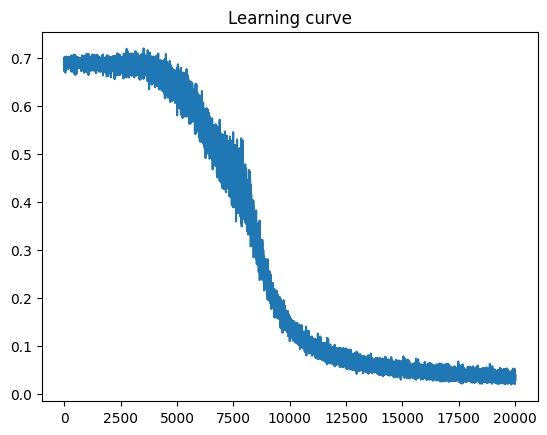

In [180]:
plt.plot(J_list)
plt.title("Learning curve");

- Take a long time before decreasing, therefore i will lower the treshold to avoid stopping to early

In [181]:
y_pred = predict_shallowNN(X_val_c,W1,W2,b1,b2)
acc = accuracy_score(y_pred,y_val_c)
print(f'Accuracy score : {acc: .3f}')

Accuracy score :  0.977


Experiment : 
- `n_nodes = 5,lr = 0.001,eps = 1e-7,max_iterations=1000000` -->  takes a long time to decrease, convergence not reached, accuracy = 0.912, increase the number of iterations  
- `n_nodes = 5,lr = 0.001,eps = 1e-8,max_iterations=2000000` --> 0.977, let's increase max_iteration again   
- `n_nodes = 5,lr = 0.001,eps = 1e-8,max_iterations= 3000000` --> 0.989, better, lets increase again 
- `n_nodes = 5,lr = 0.001,eps = 1e-8,max_iterations= 5000000` --> 0.977, slighly overfit, lets increase the number of nodes
- `n_nodes = 10,lr = 0.001,eps = 1e-8,max_iterations= 3000000` --> 0.977


Best model found : n_nodes = 5,lr = 0.001,eps = 1e-8,max_iterations= 3000000

In [183]:
# train on train + validation
X_train_c_tot = np.concatenate((X_train_c, X_val_c), axis=0)
y_train_c_tot = np.concatenate((y_train_c, y_val_c), axis=0)
J_list,W1,W2,b1,b2 = shallowNeuralNet(X_train_c_tot,y_train_c_tot,n_nodes=5,lr = 0.001,eps = 1e-8,max_iterations=3000000)

epoch 1 J = 0.6934227470086237
epoch 2 J = 0.6935812872999292
epoch 3 J = 0.6934225947168842
epoch 4 J = 0.693098011428324
epoch 5 J = 0.6938220161097332
epoch 6 J = 0.693432808882523
epoch 7 J = 0.6934679911252244
epoch 8 J = 0.6930498397743189
epoch 9 J = 0.693790365303032
epoch 10 J = 0.6932917349812782
epoch 11 J = 0.6936276664159129
epoch 12 J = 0.6924693626736802
epoch 13 J = 0.6914011732449479
epoch 14 J = 0.6925232210015222
epoch 15 J = 0.6932378666578796
epoch 16 J = 0.6891781253846344
epoch 17 J = 0.6904009448425018
epoch 18 J = 0.6942639820531772
epoch 19 J = 0.6937623816403367
epoch 20 J = 0.6931704244260511
epoch 21 J = 0.6918233240766679
epoch 22 J = 0.6981628683658968
epoch 23 J = 0.6891916904017296
epoch 24 J = 0.6906875021617436
epoch 25 J = 0.6943987762436389
epoch 26 J = 0.689927893282605
epoch 27 J = 0.693071999265711
epoch 28 J = 0.6933946830023776
epoch 29 J = 0.6943477775518513
epoch 30 J = 0.6908609383805097
epoch 31 J = 0.6938438714896875
epoch 32 J = 0.6948031

In [184]:
# test
y_pred = predict_shallowNN(X_test_c,W1,W2,b1,b2)
acc = accuracy_score(y_pred,y_test_c)
print(f'Test Accuracy score : {acc: .3f}')

Test Accuracy score :  0.994


- 0.994 accuracy is very good !

#### Visualisation

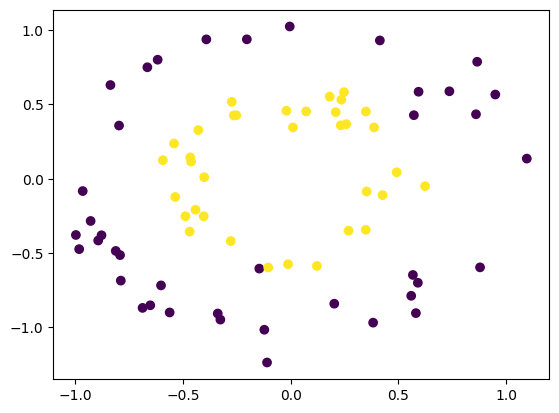

In [173]:
plt.scatter(X_test_c[:, 0], X_test_c[:, 1], c=y_pred, cmap='viridis');

## Part 4 

### Load dataset

In [186]:
# This function taken directly from the Fashion-MNIST github site: 
# https://github.com/zalandoresearch/fashion-mnist/blob/master/utils/mnist_reader.py

# Note: first arg is the path name, second is the file prefix, either 'train' or 't10k' (which is 10k of test data)
def load_mnist(path, kind='train'): 
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [187]:
(train_imgs, train_labels) = load_mnist('./fashion-mnist-data', 'train')
(test_imgs, test_labels) = load_mnist('./fashion-mnist-data', 't10k')

In [188]:
label_names = ['T-shirt/top', 'Trouser' , 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [189]:
print(f"Shape of images is {train_imgs.shape}, labels is {train_labels.shape}")

Shape of images is (60000, 784), labels is (60000,)


#### Select the class

In [190]:
SELETCED_CLASS = ['Shirt', 'Sandal']
class1_index = label_names.index(SELETCED_CLASS[0])
class2_index = label_names.index(SELETCED_CLASS[1])


In [191]:
# Filter train data
train_indices = np.where((train_labels == class1_index) | (train_labels == class2_index))
train_imgs = train_imgs[train_indices]
train_labels = train_labels[train_indices]

# Filter test data
test_indices = np.where((test_labels == class1_index) | (test_labels == class2_index))
test_imgs = test_imgs[test_indices]
test_labels = test_labels[test_indices]

# Replace labels to 0 and 1 
train_labels[train_labels == class1_index] = 0
train_labels[train_labels == class2_index] = 1

test_labels[test_labels == class1_index] = 0
test_labels[test_labels == class2_index] = 1

unique_labels, counts = np.unique(train_labels, return_counts=True)
unique_labelst, countst = np.unique(test_labels, return_counts=True)
for label, count in zip(unique_labels, counts):
    print(f"Label {label}: {count} samples")

Label 0: 6000 samples
Label 1: 6000 samples


In [181]:
# Uncoment this section to select fewer sample
#num_samples_to_choose = 6000

# Generate random indices to select 500 samples
#random_indices = np.random.choice(train_imgs.shape[0], num_samples_to_choose, replace=False)

# Select the random samples from filtered training data
#train_imgs = train_imgs[random_indices]
#train_labels = train_labels[random_indices]

In [205]:
X_train_mnist_tot = train_imgs/255 # Normalising pixel to range 0 to 1
y_train_mnist_tot = train_labels

#### Train / Validation split

In [194]:
X_train_mnist, X_val_mnist, y_train_mnist, y_val_mnist = train_test_split(X_train_mnist_tot, y_train_mnist_tot, test_size=0.7, random_state=42)

In [201]:
J_list,W1,W2,b1,b2 = shallowNeuralNet(X_train_mnist,y_train_mnist,15,lr=0.01,eps = 1e-4)

epoch 1 J = 0.17931141903240025
epoch 2 J = 0.03151589824060678
epoch 3 J = 0.01592707557947925
epoch 4 J = 0.010653182846852176
epoch 5 J = 0.011798266321586405
epoch 6 J = 0.0108625407847086
epoch 7 J = 0.0071839243261071755
epoch 8 J = 0.010048262756235802
epoch 9 J = 0.010188863306313918
epoch 10 J = 0.007336675944057415
epoch 11 J = 0.0053857972117864385
epoch 12 J = 0.006887084450768752
epoch 13 J = 0.00454056211124524
epoch 14 J = 0.003643237172236353
epoch 15 J = 0.006238735349166532
epoch 16 J = 0.003286886106984531
epoch 17 J = 0.004323327778504105
epoch 18 J = 0.0028800558701500374
epoch 19 J = 0.0036278704980110873
epoch 20 J = 0.00360243184913407
Training complete, convergence is reached after 20 epochs


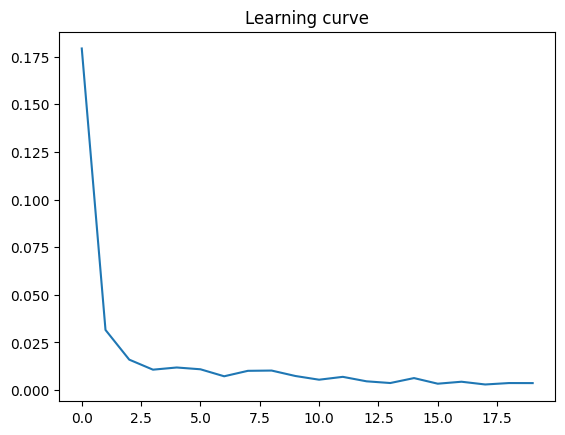

In [202]:
plt.plot(J_list)
plt.title("Learning curve");

Notes : 
- there is much more data than blob or circle so for the same number of iteration there is much less epoch

In [203]:
y_pred = predict_shallowNN(X_val_mnist,W1,W2,b1,b2)
acc = accuracy_score(y_pred,y_val_mnist)
print(f'Accuracy score : {acc: .3f}')

Accuracy score :  0.998


Experiment : 
- `n_nodes = 10,lr=0.01,eps = 1e-3`  --> 0.998, already very good !, lower eps
- `n_nodes = 10,lr=0.01,eps = 1e-4`  --> 0.998, not improving, increase number of nodes
- `n_nodes = 15,lr=0.01,eps = 1e-4` --> still 0.998

I choose the first model because same result for less training time and avoid overfitting

In [206]:
J_list,W1,W2,b1,b2 = shallowNeuralNet(X_train_mnist_tot,y_train_mnist_tot,10,lr=0.01,eps = 1e-3)

epoch 1 J = 0.0929291996231244
epoch 2 J = 0.012599193568502197
epoch 3 J = 0.0073155570304457886
epoch 4 J = 0.007495496961503398
Training complete, convergence is reached after 4 epochs


In [208]:
X_test_mnist = test_imgs/255
y_test_mnist = test_labels
y_pred = predict_shallowNN(X_test_mnist,W1,W2,b1,b2)
acc = accuracy_score(y_pred,y_test_mnist)
print(f'Accuracy score : {acc: .3f}')
cm = confusion_matrix(y_test_mnist, y_pred)
cm

Accuracy score :  0.999


array([[ 998,    2],
       [   0, 1000]])

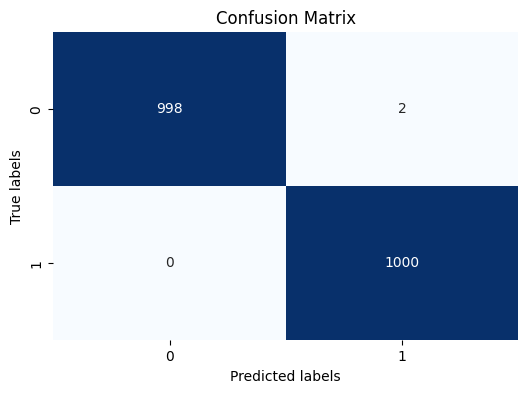

In [209]:
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

Only two misclasified !

## Part 5

Implementation for any number of layer and any number of nodes for each layer, I reused the previous code because it is again the same structure.  
The challenging part for me is to find the right data structure not really for effeciency but rather for understanding and keep it close to the lecture notes.  
I choosed to store every weight, z-value and a-value in a python list, where the index correspond to the layer. And for each layer I stored the corresponding parameter in a numpy array as before. 
The code bellow is showing how I initilised it with a for loop and then printing the shape for each layer to check wether it's right shape.  
The list `struct` is representing the structure of the network, the first item is the number of node of first layer and so on. 

In [210]:
## test for parameter initialisation
struct = [10,20,30,20,10]
stopping = False
# initialize parameters
X = X_train_b

# First layer
W = [np.random.normal(size=(struct[0], X.shape[1]))]
b = [np.random.normal(size = (struct[0]))]
for i in range(len(struct)-1):
    W.append(np.random.normal(size=(struct[i+1],struct[i]))) # first index is next node, second index is current node
    b.append(np.random.normal(size=(struct[i+1])))

# Last layer
W.append(np.random.normal(size=(1,struct[-1])))
b.append(np.random.normal(size=(1)))
for i in range(len(W)):
    print("W shape is ",W[i].shape)
    print("b shape is " ,b[i].shape)

print(len(W))

W shape is  (10, 3)
b shape is  (10,)
W shape is  (20, 10)
b shape is  (20,)
W shape is  (30, 20)
b shape is  (30,)
W shape is  (20, 30)
b shape is  (20,)
W shape is  (10, 20)
b shape is  (10,)
W shape is  (1, 10)
b shape is  (1,)
6


Implementation details : 
- The notation in lecture note were a little bit different than what I did. Indeed a python list start at index 0 but the lecture notes start with layer 1 !
- Also, for back prop the slide said to use `a[l-1]` for `l` between `L` and and `1`. The tricky thing is that `a[0]` in the slide correspond to `x` (I took a long time realising that)
- Therefore, I did the last backprop for the input layer outside the loop "manually" replacing `a[0]` by `x`
- Also, I did not use vectorisation AT ALL even for forward prop because it was too confusing, I stayed consistent with the lecture slides and did A LOT of for loop
- The algorithm is slower than the other because forward prop is done without vectorisation

In [213]:
def NeuralNet(X,Y,struct,lr = 0.001, max_iterations = 10000000,eps = 1e-4,nu = 0,sigma = 0.1):
    stopping = False
    # initialize parameters
    W = [np.random.normal(nu,sigma,size=(struct[0], X.shape[1]))]
    b = [np.random.normal(nu,sigma,size = (struct[0]))]
    for i in range(len(struct)-1):
        W.append(np.random.normal(nu,sigma,size=(struct[i+1],struct[i])))
        b.append(np.random.normal(nu,sigma,size=(struct[i+1])))
    W.append(np.random.normal(nu,sigma,size=(1,struct[-1])))
    b.append(np.random.normal(nu,sigma,size=(1)))

    N = len(X[:,1])
    N_layer = len(W)
    J_running = 0
    J_running_prev = 0
    iteration = 0 
    J_list = []
    epoch = 0

    while not stopping: 
        i = rd.randint(0,N-1)
        x,y = X[i],Y[i]
        z = [0] * N_layer
        a = [0] * N_layer
        
        # forward propagation 

        # First layer

        n_nodes_1 = W[0].shape[0]  
        n_nodes_input = W[0].shape[1]

        z[0] = np.zeros(shape=(n_nodes_1))
        a[0] = np.zeros(shape=(n_nodes_1))

        
        for i in range(n_nodes_1):
            z[0][i] = sum([W[0][i,j] * x[j] for j in range(n_nodes_input)]) + b[0][i]
        for i in range(n_nodes_1):
            a[0][i] = sigmoid(z[0][i])
    
        for l in range(1,N_layer):
            n_nodes = W[l].shape[0] # number of node of current layer l
            n_nodes_before = W[l-1].shape[0] #number of node of layer l-1
            
            z[l] = np.zeros(shape=(n_nodes))
            a[l] = np.zeros(shape=(n_nodes))
            
            for i in range(n_nodes):
                z[l][i] = sum([W[l][i,j] * a[l-1][j] for j in range(n_nodes_before)]) + b[l][i]
            for i in range(n_nodes):
                a[l][i] = sigmoid(z[l][i])



        y_hat = a[-1][0]
        J_current = - (y*np.log(y_hat + 1e-8) + (1-y)*np.log(1-y_hat + 1e-8))
    

        # Backward Propagation 
        DZ = [0] * N_layer
        DW = [0] * N_layer
        DB = [0] * N_layer

        # Output layer
        DZ[-1] = np.array([y_hat - y])
        DW[-1] = DZ[-1] * a[N_layer-2]
        DB[-1] = DZ[-1]


        # hidden layer
        for l in range(N_layer-2,0,-1): # loop backward
            n_nodes = W[l].shape[0] # number of node of current layer l
            n_nodes_next = W[l+1].shape[0] # number of node of layer l + 1
            n_nodes_before = W[l-1].shape[0] # number of node of layer l - 1
            
            # DZ 
            DZ[l] = np.zeros(shape=(n_nodes))
            for i in range(n_nodes):
                DZ[l][i] = dsigmoid(z[l][i]) * sum([DZ[l+1][j] * W[l+1][j,i] for j in range(n_nodes_next)])
    
            # DW and DB
            DW[l] = np.zeros(shape=(n_nodes,n_nodes_before))
            DB[l] = np.zeros(shape=(n_nodes))
            for j in range(n_nodes):
                DB[l][j] = DZ[l][j]
                for i in range(n_nodes_before):
                    DW[l][j,i] = DZ[l][j] * a[l-1][i]

        # First layer
          
        n_nodes = W[0].shape[0] # number of node of current layer 0
        n_nodes_next = W[1].shape[0] # number of node of layer 1
        n_nodes_before = W[0].shape[1] # Input layer size

        DZ[0] = np.zeros(shape=(n_nodes))
        for i in range(n_nodes):
            DZ[0][i] = dsigmoid(z[0][i]) * sum([DZ[1][j] * W[1][j,i] for j in range(n_nodes_next)])
        DW[0] = np.zeros(shape=(n_nodes,n_nodes_before))
        DB[0] = np.zeros(shape=(n_nodes))

        for j in range(n_nodes):
            DB[0][j] = DZ[0][j]
            for i in range(n_nodes_before):
                DW[0][j,i] = DZ[0][j] * x[i]
            

        #Gradient descent 
        for l in range(len(W)):
            W[l] -= lr*DW[l]
            b[l] -= lr*DB[l]

        iteration += 1
        J_running += J_current
        if iteration > max_iterations: stopping = True 
        if (iteration % N) == 0: 
            epoch += 1
            J_running = J_running / N
            J_list.append(J_running)
            if abs(J_running - J_running_prev) < eps : stopping = True
            print(f'epoch {epoch} J = {J_running}')
            J_running_prev = J_running
            J_running = 0
            

    # Print wether the convergence is reached or not
    if iteration == max_iterations + 1:
        print("max iteration reached, convergence is not reached you may need to adjust parameters")
    else : 
        print(f"Training complete, convergence is reached after {epoch} epochs")
    return (J_list,W,b)              
                           
                

In [214]:
def predict_NN(X,W,b):
    N_layer = len(W)
    z = [0] * N_layer
    a = [0] * N_layer
    y_pred = []
    for i in range(len(X[:,1])):
        x = X[i]
        n_nodes_1 = W[0].shape[0]  
        n_nodes_input = W[0].shape[1]

        z[0] = np.zeros(shape=(n_nodes_1))
        a[0] = np.zeros(shape=(n_nodes_1))

        
        for i in range(n_nodes_1):
            z[0][i] = sum([W[0][i,j] * x[j] for j in range(n_nodes_input)]) + b[0][i]
        for i in range(n_nodes_1):
            a[0][i] = sigmoid(z[0][i])
    
        for l in range(1,N_layer):
            n_nodes = W[l].shape[0] # number of node of current layer l
            n_nodes_before = W[l-1].shape[0] #number of node of layer l-1
            
            z[l] = np.zeros(shape=(n_nodes))
            a[l] = np.zeros(shape=(n_nodes))
            
            for i in range(n_nodes):
                z[l][i] = sum([W[l][i,j] * a[l-1][j] for j in range(n_nodes_before)]) + b[l][i]
            for i in range(n_nodes):
                a[l][i] = sigmoid(z[l][i])

        y_hat = a[-1][0]
        y_pred.append(y_hat)

    y_pred_binary = [1 if y > 0.5 else 0 for y in y_pred]
    return y_pred_binary
        
    

#### Test on MNIST

In [218]:
struct = [10,5]
J_list,W,b = NeuralNet(X_train_mnist,y_train_mnist,struct,lr=0.01,eps =1e-3)

epoch 1 J = 0.685983039334789
epoch 2 J = 0.3696366174344911
epoch 3 J = 0.05480680596018845
epoch 4 J = 0.031052099801585083
epoch 5 J = 0.02314271493406778
epoch 6 J = 0.012462214979251882
epoch 7 J = 0.013933320298550126
epoch 8 J = 0.011046539851366726
epoch 9 J = 0.010915502185850988
Training complete, convergence is reached after 9 epochs


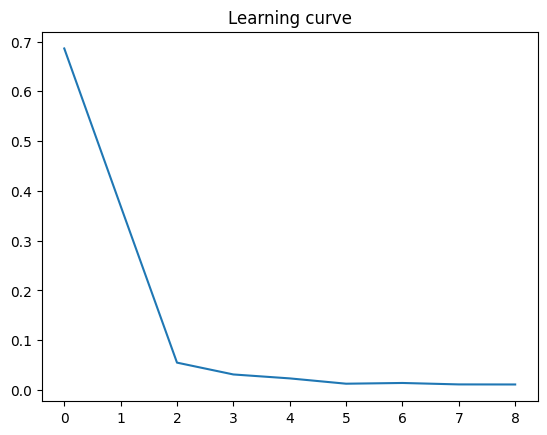

In [219]:
plt.plot(J_list)
plt.title("Learning curve");

In [220]:
y_pred = predict_NN(X_val_mnist,W,b)
acc = accuracy_score(y_pred,y_val_mnist)
print(f'Accuracy score : {acc: .3f}')

Accuracy score :  0.998


Experiment : 
- `struct = [10,3], lr=0.01,eps =1e-3` --> 0.997 
- `struct = [10,5], lr=0.01,eps =1e-3` --> 0.998

I will choose the last structure

In [221]:
J_list,W,b = NeuralNet(X_train_mnist_tot,y_train_mnist_tot,[10,5],lr=0.01,eps =1e-3)

epoch 1 J = 0.3102324849091516
epoch 2 J = 0.019116508226891423
epoch 3 J = 0.01128831351639313
epoch 4 J = 0.007598700318184317
epoch 5 J = 0.005913216520391843
epoch 6 J = 0.00692163804000216
epoch 7 J = 0.005817769065915898
epoch 8 J = 0.004999345933284306
Training complete, convergence is reached after 8 epochs


In [222]:
y_pred = predict_NN(X_test_mnist,W,b)
acc = accuracy_score(y_pred,y_test_mnist)
print(f'Accuracy score : {acc: .3f}')

Accuracy score :  1.000


Accuracy of 1 on test set !

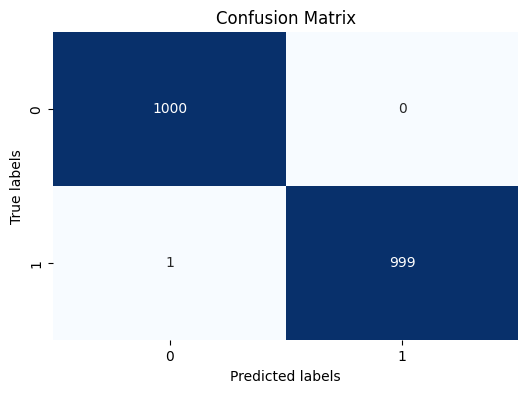

In [224]:
cm = confusion_matrix(y_test_mnist, y_pred)
cm
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

## Enhacement

The enhancement I choosed is multi class to solve mnist for all classes. 
Difference in the code : 
- The input label y need to be encoded in a vector enc_y where `enc_y[i] = 1` if `y = 1` and `0` for the rest
- The parameter in the output does not have the same size it's `(N_class,n_nodes)` instead of `(1,n_nodes)`
- Last layer activation function is softmax and not sigmoid
- The back prop in the last layer change a little bit because of the soft max function. The error `y-y_hat` is now a n_nodes sized vector
- The rest stay the same


In [229]:
def softmax(z):
    s = sum([np.exp(z[i]) for i in range(len(z))])
    return np.exp(z)/s

In [230]:
#test of softmax
softmax(np.array([0,1.4,0.5,0.6]))

array([0.11728774, 0.47562525, 0.1933748 , 0.2137122 ])

In [264]:
def NeuralNet_bis(X,Y,struct,lr = 0.001, max_iterations = 1000000,eps = 1e-4,nu = 0,sigma=0.1):
    
    N = len(X[:,1])
    J_running = 0
    J_running_prev = 0
    iteration = 0 
    J_list = []
    epoch = 0
    class_name = np.unique(Y)
    N_class = len(class_name) # number of class
    stopping = False

    # initialize parameters
    W = [np.random.normal(nu,sigma,size=(struct[0], X.shape[1]))]
    b = [np.random.normal(nu,sigma,size = (struct[0]))]
    for i in range(len(struct)-1):
        W.append(np.random.normal(nu,sigma,size=(struct[i+1],struct[i])))
        b.append(np.random.normal(nu,sigma,size=(struct[i+1])))

    W.append(np.random.normal(nu,sigma,size=(N_class,struct[-1]))) # change here because last layer has N_class nodes
    b.append(np.random.normal(nu,sigma,size=(N_class)))
    N_layer = len(W)


    while not stopping: 
        i = rd.randint(0,N-1)
        x,y = X[i],Y[i]


        # Encoding the class number to a one hot vector
        enc_y = [0] * N_class
        enc_y[y] = 1
        enc_y = np.array(enc_y)


        z = [0] * N_layer
        a = [0] * N_layer
        
        # forward propagation 

        # First layer
        n_nodes_1 = W[0].shape[0]  
        n_nodes_input = W[0].shape[1]

        z[0] = np.zeros(shape=(n_nodes_1))
        a[0] = np.zeros(shape=(n_nodes_1))

        
        for i in range(n_nodes_1):
            z[0][i] = sum([W[0][i,j] * x[j] for j in range(n_nodes_input)]) + b[0][i]
        for i in range(n_nodes_1):
            a[0][i] = sigmoid(z[0][i])
    
        for l in range(1,N_layer-1):
            n_nodes = W[l].shape[0] # number of node of current layer l
            n_nodes_before = W[l-1].shape[0] #number of node of layer l-1
            
            z[l] = np.zeros(shape=(n_nodes))
            a[l] = np.zeros(shape=(n_nodes))
            

            for i in range(n_nodes):
                z[l][i] = sum([W[l][i,j] * a[l-1][j] for j in range(n_nodes_before)]) + b[l][i]
            for i in range(n_nodes):
                a[l][i] = sigmoid(z[l][i])
        z[-1] = np.zeros(shape=(N_class))
        for i in range(N_class):
            z[-1][i] = sum([W[-1][i,j] * a[-2][j] for j in range(struct[-1])]) + b[-1][i]
        a[-1] = softmax(z[-1])
        y_hat = a[-1]
        J_current = - sum([enc_y[i] * np.log(y_hat[i]) for i in range(N_class)])
    

        # Backward Propagation 
        DZ = [0] * N_layer
        DW = [0] * N_layer
        DB = [0] * N_layer

        # Output layer
        DZ[-1] = np.zeros(shape=(N_class))
        for j in range(N_class):
            DZ[-1][j] = a[-1][j] - enc_y[j]

        
        DW[-1] = np.zeros(shape=(N_class,struct[-1]))
        DB[-1] = np.zeros(shape=(N_class))
        for j in range(N_class):
            DB[-1][j] = DZ[-1][j]
            for i in range(struct[-1]):
                DW[-1][j,i] = DZ[-1][j] * a[N_layer-2][i]
        
        # hidden layer
        for l in range(N_layer-2,0,-1): 
            n_nodes = W[l].shape[0] # number of node of current layer l
            n_nodes_next = W[l+1].shape[0] # number of node of layer l + 1
            n_nodes_before = W[l-1].shape[0] # number of node of layer l - 1
            
            # DZ 
            DZ[l] = np.zeros(shape=(n_nodes))
            for i in range(n_nodes):
                DZ[l][i] = dsigmoid(z[l][i]) * sum([DZ[l+1][j] * W[l+1][j,i] for j in range(n_nodes_next)])

            # DW and DB
            DW[l] = np.zeros(shape=(n_nodes,n_nodes_before))
            DB[l] = np.zeros(shape=(n_nodes))
            for j in range(n_nodes):
                DB[l][j] = DZ[l][j]
                for i in range(n_nodes_before):
                    DW[l][j,i] = DZ[l][j] * a[l-1][i]

        # First layer
          
        n_nodes = W[0].shape[0] # number of node of current layer 0
        n_nodes_next = W[1].shape[0] # number of node of layer 1
        n_nodes_before = W[0].shape[1] # Input layer size

        DZ[0] = np.zeros(shape=(n_nodes))
        for i in range(n_nodes):
            DZ[0][i] = dsigmoid(z[0][i]) * sum([DZ[1][j] * W[1][j,i] for j in range(n_nodes_next)])
        DW[0] = np.zeros(shape=(n_nodes,n_nodes_before))
        DB[0] = np.zeros(shape=(n_nodes))
        
        for j in range(n_nodes):
            DB[0][j] = DZ[0][j]
            for i in range(n_nodes_before):
                DW[0][j,i] = DZ[0][j] * x[i]
            
        #Gradient descent 
        for l in range(len(W)):
            W[l] -= lr*DW[l]
            b[l] -= lr*DB[l]

        iteration += 1
        J_running += J_current
        if iteration > max_iterations: stopping = True 
        if (iteration % N) == 0: 
            epoch += 1
            J_running = J_running / N
            J_list.append(J_running)
            if abs(J_running - J_running_prev) < eps : stopping = True
            print(f'epoch {epoch} J = {J_running}')
            J_running_prev = J_running
            J_running = 0
            

    # Print wether the convergence is reached or not
    if iteration == max_iterations + 1:
        print("max iteration reached, convergence is not reached you may need to adjust parameters")
    else : 
        print(f"Training complete, convergence is reached after {epoch} epochs")
    return (J_list,W,b)              
                           
                

In [261]:
def predict_NN_bis(X,W,b):
    N_layer = len(W)
    z = [0] * N_layer
    a = [0] * N_layer
    y_pred = []
    N_class = W[-1].shape[0]
    for i in range(len(X[:,1])):
        x = X[i]
        n_nodes_1 = W[0].shape[0]  
        n_nodes_input = W[0].shape[1]

        z[0] = np.zeros(shape=(n_nodes_1))
        a[0] = np.zeros(shape=(n_nodes_1))

        
        for i in range(n_nodes_1):
            z[0][i] = sum([W[0][i,j] * x[j] for j in range(n_nodes_input)]) + b[0][i]
        for i in range(n_nodes_1):
            a[0][i] = sigmoid(z[0][i])
    
        for l in range(1,N_layer-1):
            n_nodes = W[l].shape[0] # number of node of current layer l
            n_nodes_before = W[l-1].shape[0] #number of node of layer l-1
            
            z[l] = np.zeros(shape=(n_nodes))
            a[l] = np.zeros(shape=(n_nodes))
            

            for i in range(n_nodes):
                z[l][i] = sum([W[l][i,j] * a[l-1][j] for j in range(n_nodes_before)]) + b[l][i]
            for i in range(n_nodes):
                a[l][i] = sigmoid(z[l][i])
        z[-1] = np.zeros(shape=(N_class))
        for i in range(N_class):
            z[-1][i] = sum([W[-1][i,j] * a[-2][j] for j in range(struct[-1])]) + b[-1][i]
        a[-1] = softmax(z[-1])
        y_hat = a[-1]

        y_hat = a[-1]
        y_pred.append(y_hat)

    y_pred_final = [np.argmax(y) for y in y_pred]
    return y_pred_final

### Test of the multiclass algorithm on 2 class

In [270]:
struct = [10,3]
J_list,W,b = NeuralNet_bis(X_train_mnist,y_train_mnist,struct,lr=0.01,eps =1e-3)

epoch 1 J = 0.6930036379554865
epoch 2 J = 0.5099164104197978
epoch 3 J = 0.07719364418898102
epoch 4 J = 0.03266208947453095
epoch 5 J = 0.022592974015271605
epoch 6 J = 0.01664108417170061
epoch 7 J = 0.009374304556493514
epoch 8 J = 0.010805044138782801
epoch 9 J = 0.008354762964030763
epoch 10 J = 0.010965509788897647
epoch 11 J = 0.006149816580507085
epoch 12 J = 0.005632946041426214
Training complete, convergence is reached after 12 epochs


Still working !

#### Mutli-class classification on MNIST

In [271]:
# Reload the whole dataset
(train_imgs, train_labels) = load_mnist('./fashion-mnist-data', 'train')
(test_imgs, test_labels) = load_mnist('./fashion-mnist-data', 't10k')

In [272]:
num_samples_to_choose = 10000 


random_indices = np.random.choice(train_imgs.shape[0], num_samples_to_choose, replace=False)

# Select the random samples from filtered training data
train_imgs = train_imgs[random_indices]
train_labels = train_labels[random_indices]

Notes : I did not stratified the so the number of sample for each class is random. One improvement could be making sure that each class has the same number of sample

In [273]:
X_train_mnist_multi_tot = train_imgs/255
y_train_mnist_multi_tot = train_labels

X_train_mnist_multi, X_val_mnist_multi, y_train_mnist_multi, y_val_mnist_multi = train_test_split(X_train_mnist_multi_tot, y_train_mnist_multi_tot, test_size=0.7, random_state=42)

In [279]:
struct = [10,5]
J_list,W,b = NeuralNet_bis(X_train_mnist_multi,y_train_mnist_multi,struct,lr=0.01,eps =1e-3,sigma = 0.1)

epoch 1 J = 2.3085255178558968
epoch 2 J = 2.303008099957312
epoch 3 J = 2.2693341795635433
epoch 4 J = 2.0138837408536534
epoch 5 J = 1.7730563467917275
epoch 6 J = 1.7012987438577354
epoch 7 J = 1.6419191102101813
epoch 8 J = 1.580995149105826
epoch 9 J = 1.5084675164359977
epoch 10 J = 1.4341291385249764
epoch 11 J = 1.3503202454848067
epoch 12 J = 1.277475344016405
epoch 13 J = 1.2505882291225243
epoch 14 J = 1.1976575789775048
epoch 15 J = 1.1643676756502022
epoch 16 J = 1.113433052044233
epoch 17 J = 1.081463854078835
epoch 18 J = 1.041254263967268
epoch 19 J = 1.020616576781434
epoch 20 J = 0.9856546650523549
epoch 21 J = 0.960771853036793
epoch 22 J = 0.9227832751578731
epoch 23 J = 0.9215781615667256
epoch 24 J = 0.8872981506986233
epoch 25 J = 0.8470947974299606
epoch 26 J = 0.7961683542248
epoch 27 J = 0.77726668780947
epoch 28 J = 0.7463157517349327
epoch 29 J = 0.724509829561656
epoch 30 J = 0.6608329945107941
epoch 31 J = 0.6650255419442266
epoch 32 J = 0.6404437560371341

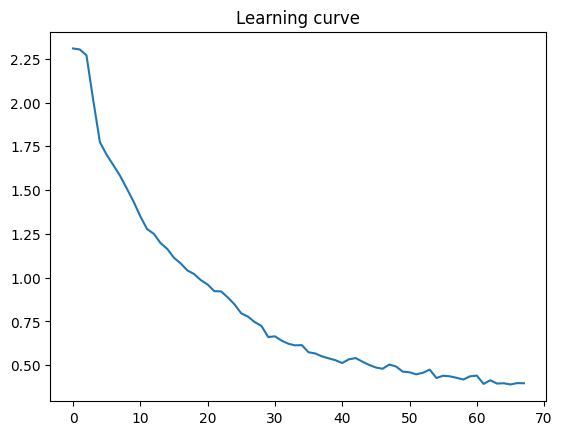

In [280]:
plt.plot(J_list)
plt.title("Learning curve");

In [281]:
y_pred = predict_NN_bis(X_val_mnist_multi,W,b)
acc = accuracy_score(y_pred,y_val_mnist_multi)
print(f'Accuracy score : {acc: .3f}')

Accuracy score :  0.759


Experiment : 
- `struct = [10,5],lr=0.01,eps =1e-3` --> 0.75 Training was 10 minutes long so I will not do a lot of experiment. Maybe I will try to add a third layer
- 'struct = [10,5,10],lr=0.01,eps =1e-3' --> very bad result the algorithm converges after 2 epochs with no improvement
- 'struct = [10,5,3],lr=0.01,eps =1e-3,sigma = 1' --> I changed sigma and I obtained better results but still not as good as the first one

I will keep the first setting for testing

In [301]:
J_list,W,b = NeuralNet_bis(X_train_mnist_multi_tot,y_train_mnist_multi_tot,[10,5],lr=0.01,eps =1e-3)

epoch 1 J = 2.2306187298289695
epoch 2 J = 1.6670320871858035
epoch 3 J = 1.3032178415028821
epoch 4 J = 1.097751847145886
epoch 5 J = 0.9788980411888549
epoch 6 J = 0.8733461985992422
epoch 7 J = 0.7929956556800463
epoch 8 J = 0.7535287246756104
epoch 9 J = 0.7221931890525053
epoch 10 J = 0.7055325047762019
epoch 11 J = 0.6553188736322496
epoch 12 J = 0.6262889421533273
epoch 13 J = 0.6081514253598204
epoch 14 J = 0.5979818878168092
epoch 15 J = 0.5778823002885102
epoch 16 J = 0.5618469641764304
epoch 17 J = 0.5334126805154846
epoch 18 J = 0.5262015071800061
epoch 19 J = 0.4977592899590426
epoch 20 J = 0.4774547450830575
epoch 21 J = 0.4846126552087798
epoch 22 J = 0.4510031833807765
epoch 23 J = 0.44934894582663193
epoch 24 J = 0.4406145001158703
epoch 25 J = 0.42061658953132663
epoch 26 J = 0.4054670629919009
epoch 27 J = 0.4173037335712279
epoch 28 J = 0.3964084628259736
epoch 29 J = 0.4021503919578842
epoch 30 J = 0.37247378849496393
epoch 31 J = 0.3906764493579517
epoch 32 J = 0.

In [ ]:
X_test_mnist_multi = test_imgs/255
y_test_mnist_multi = test_labels

y_pred = predict_NN(X_test_mnist_multi,W,b)
acc = accuracy_score(y_pred,y_test_mnist_multi)
print(f'Accuracy score : {acc: .3f}')

In [ ]:
cm = confusion_matrix(y_test_mnist_multi, y_pred)
cm
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()